# Tutorial


In [2]:
%load_ext autoreload
%autoreload 2

import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('NVcenter')]+ 'NVcenter'
os.chdir(ROOT_DIR)

from NVcenter import *
plt.style.use('qDNA-default')

## Spin Bath Configurations

In [3]:
import os

filename = 'tutorial_bath'
directory = os.getcwd()

# spin_type, abundancy, rmin, rmax, num_baths, num_init_states = 'C13', 0.5e-2, 0, 4e-9, 2, 100
# save_spin_baths(filename, directory, spin_type, abundancy, rmin, rmax, num_baths, num_init_states)

bath_configs_nested = load_spin_baths(filename, directory)
bath_configs = [item for sublist in bath_configs_nested for item in sublist]

In [4]:
register_config = [('NV', (0, 0, 0), 0, {})]
ham = Hamiltonian(register_config, bath_configs[0], 'gCCE1')

Calculating Hamiltonians for gCCE1: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:03<00:00, 78.19it/s]

Time to calculate the Hamiltonian matrices: 3.025709390640259
Time to initialize the Hamiltonian class: 3.0999789237976074


In [4]:
from tqdm import tqdm
for i in tqdm(range(ham.num_systems)):
    np.linalg.eigh( ham.matrices[i].full() )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 16165.40it/s]


In [10]:
pulse = Pulse(register_config, bath_configs[0])
pulse.pulse_seq = [2e-6, 2e-6, 2e-6, 1e-6, 1e-6, np.pi, np.pi]
pulse.approx_level = 'gCCE1'
pulse_matrices = pulse.calc_pulse_matrices()
pulse.calc_new_states_full()

Calculating Hamiltonians for no_bath: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Time to calculate the Hamiltonian matrices: 0.0
Time to initialize the Hamiltonian class: 0.011532783508300781


Calculating Hamiltonians for gCCE1: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:01<00:00, 208.39it/s]


Time to calculate the Hamiltonian matrices: 1.13246750831604
Time to initialize the Hamiltonian class: 1.151538372039795


Calculating pulse matrices for gCCE1: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 401.55it/s]


Time to calculate the pulse matrices: 0.5877237319946289 s.


Calculating pulse matrices for gCCE1: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 411.19it/s]


Time to calculate the pulse matrices: 0.5749359130859375 s.


Calculating new states for gCCE1: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 937.93it/s]


Time to calculate the new states: 0.8265528678894043 s.


[[Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
  Qobj data =
  [[1.00000001e+00 1.00000000e-08]
   [1.00000000e-08 1.00000000e-08]],
  Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
  Qobj data =
  [[1.00000001e+00+0.00000000e+00j 1.18655516e-08-3.22567399e-09j]
   [1.18655516e-08+3.22567399e-09j 1.00000000e-08+0.00000000e+00j]],
  Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
  Qobj data =
  [[1.00000001e+00+0.00000000e+00j 1.38935855e-08-6.35844744e-09j]
   [1.38935855e-08+6.35844744e-09j 1.00000000e-08+0.00000000e+00j]],
  Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
  Qobj data =
  [[1.00000001e+00+0.00000000e+00j 1.60787130e-08-9.39589226e-09j]
   [1.60787130e-08+9.39589226e-09j 1.00000000e-08+0.00000000e+00j]],
  Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
  Qobj data =
  [[1.00000001e

In [45]:
# Bell (Hadamard and CNOT)
init_state = q.tensor( q.fock_dm(2,0), q.fock_dm(2,0) )
bell_gate = get_cnot_gate(2, 0, 1) * get_hada_gate(2, 0)
bell_state = bell_gate * init_state * bell_gate.dag()

C13_pos = (8.728883757198979e-10, 0.0, 1.8558998769620693e-10) # Dominik
register_config = [('NV', (0, 0, 0), 0, {}), ('C13', C13_pos, 0, {})]
bath_configs = list( load_spin_baths('Dominik_C13', DATA_DIR).values() )[:10]

env = Environment(register_config, bath_configs[:5], verbose=False, suter_method=True, instant_pulses=True, target=bell_state)
env.env_approx_level = 'no_bath'
env.pulse_seq = [0, 4.06620465e-6, 1.57022726e-6, 1.50788214e-6, 0.99813568, 3.57557112, 1.68300382, 0.69459264, 1.97327426, 0.50816523]
fidelities = env.get_fidelities(env.pulse_seq, t_list = 'automatic' )

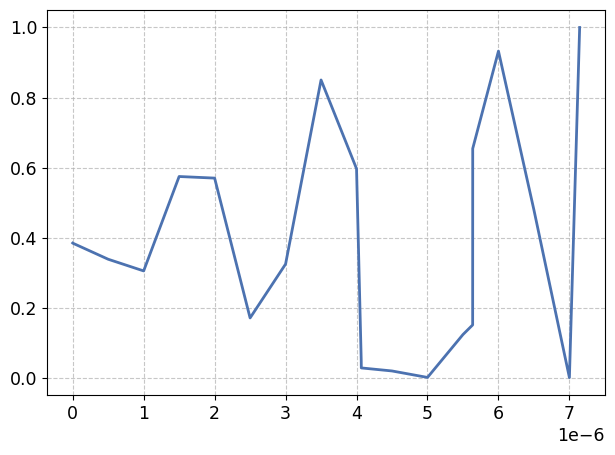

In [46]:
plt.plot(env.t_list, fidelities)